# Sprawdzenie działania wytrenowanego modelu

In [1]:
import cv2
from ultralytics import YOLO
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline

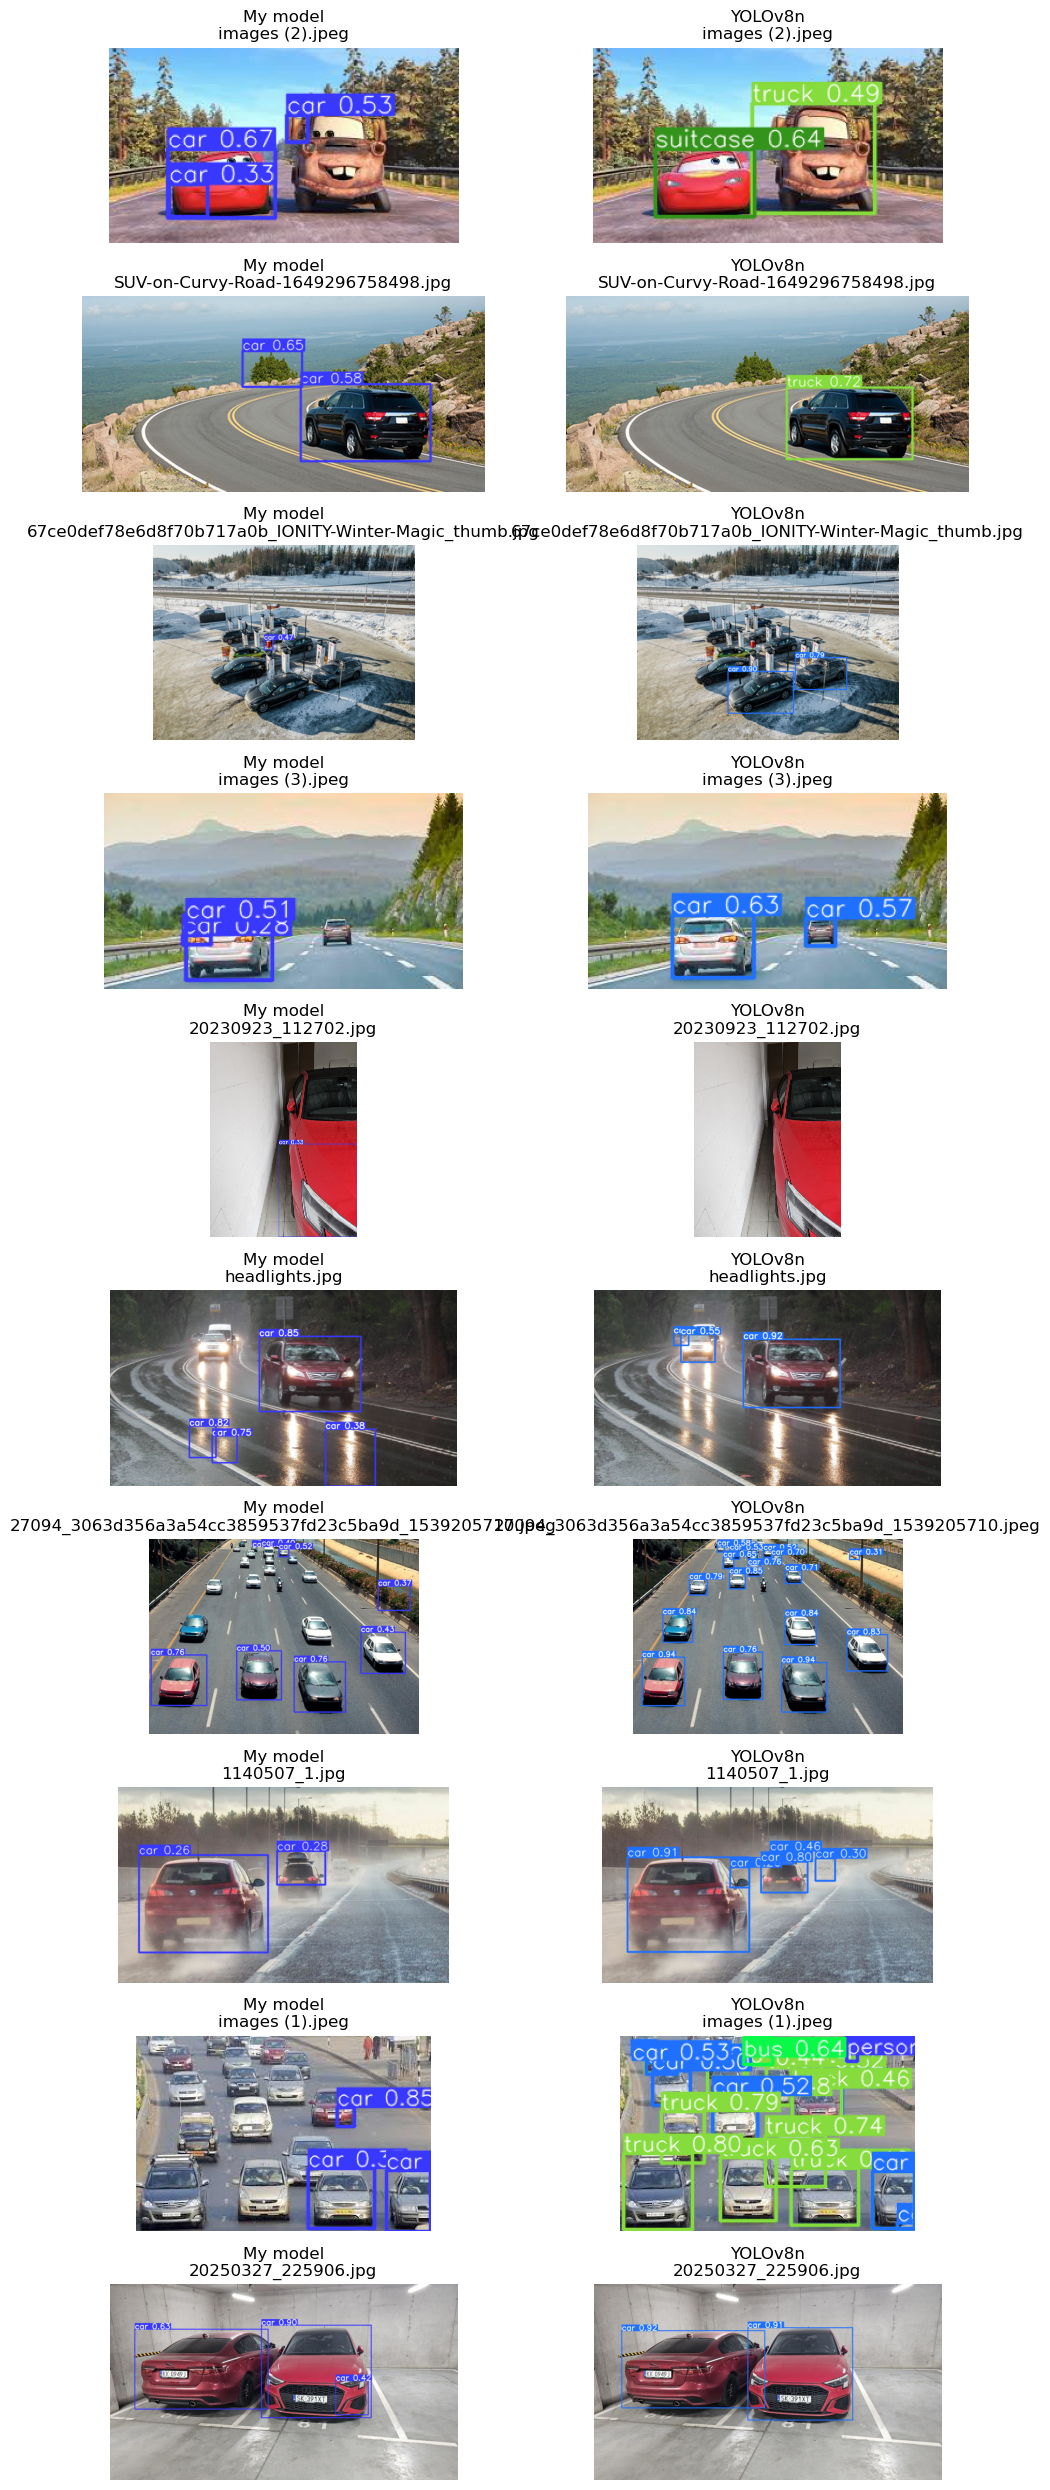

In [12]:
my_model = YOLO('runs/detect/train2/weights/best.pt')
pretrained_model = YOLO('yolov8n.pt')

image_folder = 'data/random-Gara-pics'
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]
random_images = random.sample(image_files, min(10, len(image_files)))

fig, axes = plt.subplots(len(random_images), 2, figsize=(10, len(random_images)*2.5))

for idx, img_name in enumerate(random_images):
    img_path = os.path.join(image_folder, img_name)

    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    results_my = my_model.predict(source=img_rgb, save=False, imgsz=640, conf=0.25, verbose=False)
    pred_img_my = results_my[0].plot()

    results_pre = pretrained_model.predict(source=img_rgb, save=False, imgsz=640, conf=0.25, verbose=False)
    pred_img_pre = results_pre[0].plot()

    axes[idx][0].imshow(pred_img_my)
    axes[idx][0].set_title(f'My model\n{img_name}')
    axes[idx][0].axis('off')

    axes[idx][1].imshow(pred_img_pre)
    axes[idx][1].set_title(f'YOLOv8n\n{img_name}')
    axes[idx][1].axis('off')

plt.tight_layout()
plt.show()